# Code for visualization of distributions

In [70]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

centers = np.array([[0],[10], [20], [30]])
X, y = make_blobs(n_samples=100, n_features = 1, centers=centers)


In [175]:
import torch

from soft_dtw import SoftDTW
z = torch.rand((32, 50))
centroids = torch.rand((2, 50))
n_clusters = 2
bs = 32
n_hidden = 50
def euc(z, centroids):
    z = z.expand((n_clusters, bs, n_hidden))
    mse = torch.sqrt(torch.sum((z - centroids.unsqueeze(1)) ** 2, dim=2))
    print(mse.shape)
    return torch.transpose(mse, 0, 1)
    
    
def dtw(z, centroids):
    dtw = SoftDTW(gamma = 0.1, normalize = True)
    if centroids.shape[0]==z.shape[0]:
        return dtw()
    
    aux = []
    for i in range(z.shape[0]):
        aux.append([dtw(z[i].unsqueeze(1), centroids[0].unsqueeze(1)), dtw(z[i].unsqueeze(1), centroids[1].unsqueeze(1))])
    return torch.tensor(aux).view(n_clusters, bs)

In [176]:
#dtw = SoftDTW(gamma = 0.1, normalize = True)
dtw(z, z).shape

torch.Size([2, 32])

In [178]:
euc(z, z)

RuntimeError: The size of tensor a (2) must match the size of tensor b (32) at non-singleton dimension 0

In [152]:
print(centroids.unsqueeze(1).shape)

torch.Size([2, 1, 50])


In [151]:
euc(z, centroids)

torch.Size([2, 32])


tensor([[3.1011, 2.9219],
        [3.1234, 3.0102],
        [2.9383, 3.0249],
        [3.2632, 3.1939],
        [2.8168, 3.2320],
        [2.9049, 3.2193],
        [2.6744, 2.7806],
        [3.1366, 3.0128],
        [2.9255, 2.8874],
        [3.2313, 2.7612],
        [2.9583, 2.7562],
        [2.8350, 2.9987],
        [3.0752, 3.2279],
        [2.7070, 3.1417],
        [2.8096, 2.8554],
        [3.1073, 2.9561],
        [2.8944, 3.1601],
        [3.2207, 3.0035],
        [3.0982, 2.7994],
        [2.7638, 2.7492],
        [3.1734, 3.2922],
        [2.6783, 2.9180],
        [3.2905, 3.2449],
        [2.9476, 2.7874],
        [3.0274, 2.6958],
        [3.0508, 2.9834],
        [3.2052, 2.4980],
        [3.1144, 3.0690],
        [2.9739, 2.4497],
        [2.6918, 2.8287],
        [2.8930, 3.3350],
        [2.7201, 2.9216]])

In [136]:
def similarity(point, center):
    return np.linalg.norm(point-center)

alpha = 3

def qij(points, centers):
    q = np.zeros((len(points), len(centers)))
    for i,point in enumerate(points):
        for j,center in enumerate(centers):
            q[i,j] = 1/(1+similarity(point, center))**((alpha+1)/2)
    return q/q.sum(axis=1, keepdims=True)

In [126]:
def pij(points, centers):
    q = qij(points, centers)
    f = q.sum(axis=0, keepdims=True)
    p = q**2/f
    return p/p.sum(axis=1, keepdims=True)

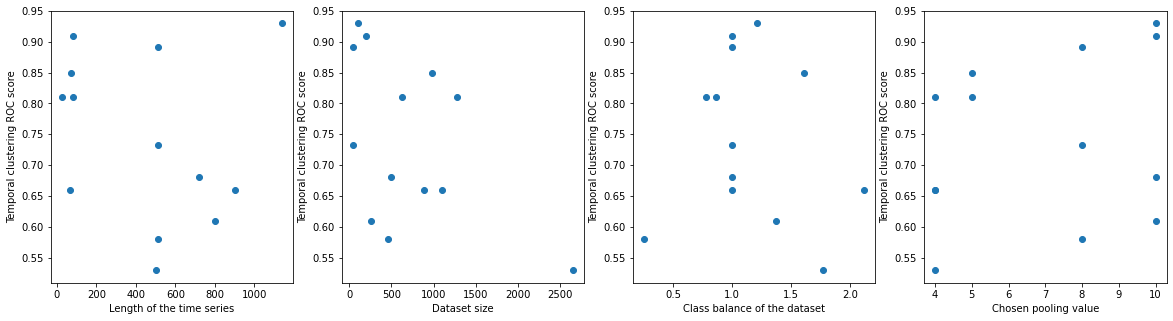

In [127]:
max_scores = [0.93,0.892,0.732,0.68,0.58,0.81,0.91,0.61,0.529,0.66,0.85,0.81,0.66]
dataset_sizes = [104,40, 40, 500,461,1272,200,258,2658,891,980,621,1096]
ts_lengths = [1140, 512, 512, 720, 512, 84, 80, 800, 500, 64, 70, 24, 900]
dataset_r = [1.21,1.00,1.00,1.00,0.25,0.86,1.00,1.37,1.77,2.12,1.61,0.78,1]
dataset_p = [10,8,8,10,8,4,10,10,4,4,5,5,4]

fig, ax = plt.subplots(1, 4, figsize=(20,5))
ax[0].scatter(ts_lengths, max_scores)
ax[0].set_xlabel('Length of the time series')
ax[0].set_ylabel('Temporal clustering ROC score')


ax[1].scatter(dataset_sizes, max_scores)
ax[1].set_xlabel('Dataset size')
ax[1].set_ylabel('Temporal clustering ROC score')

ax[2].scatter(dataset_r, max_scores)
ax[2].set_xlabel('Class balance of the dataset')
ax[2].set_ylabel('Temporal clustering ROC score')

ax[3].scatter(dataset_p, max_scores)
ax[3].set_xlabel('Chosen pooling value')
ax[3].set_ylabel('Temporal clustering ROC score')
plt.savefig('scatterplots.png')
plt.show()

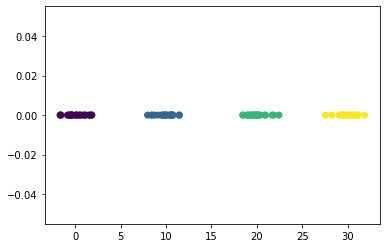

In [128]:
plt.scatter(X, np.zeros(len(X)), c = y)

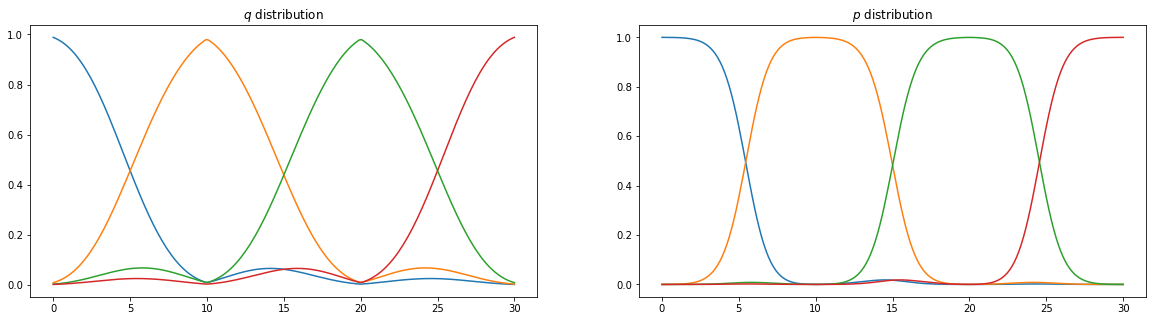

In [129]:
fig, ax = plt.subplots(1, 2, figsize = (20,5))
arr = np.linspace(0,30, 200)
ax[0].plot(arr, qij(arr, centers))
ax[0].set_title('$q$ distribution')
ax[1].plot(arr, pij(arr, centers))
ax[1].set_title('$p$ distribution')
plt.savefig('distributions.png')
plt.show()